<a href="https://colab.research.google.com/github/muhammadsaad021/Loan-Approval-Prediction/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import numpy as np
import pandas as pd

In [104]:
#upload the dataset
from google.colab import files
uploaded = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset (1).csv


In [105]:
df=pd.read_csv('loan_approval_dataset.csv')


In [120]:
#visualize the dataset
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [107]:
#visualize the columns to get better familiarity
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [108]:
#split features and training data
y=df[' loan_status']
x=df.drop(' loan_status',axis=1)
x.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [109]:
#split test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [115]:
#using pipline and transformer in order to perform one-hot encoding and scaling
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

numeric_features=['loan_id', ' no_of_dependents',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value']


categorical_features=[' education', ' self_employed']

preprocessor=ColumnTransformer(transformers=[
    ('num',StandardScaler(),numeric_features),
    ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_features)
])

model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression())

])

DTmodel=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',DecisionTreeClassifier(random_state=42))
])
RFmodel=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',RandomForestClassifier(
        n_estimators=100,      # number of trees
        max_depth=None,        # tree depth (None = grow until pure)
        random_state=4))
])

In [116]:
model.fit(x_train,y_train)
DTmodel.fit(x_train,y_train)
RFmodel.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['loan_id',
                                                   ' no_of_dependents',
                                                   ' income_annum',
                                                   ' loan_amount', ' loan_term',
                                                   ' cibil_score',
                                                   ' residential_assets_value',
                                                   ' commercial_assets_value',
                                                   ' luxury_assets_value',
                                                   ' bank_asset_value']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [' education',
                                                   ' self_employed'])])),
                ('classifier', RandomForestClassifier(random_state=4))])

In [117]:
#predicting by all three models
y_pred=model.predict(x_test)
DT_pred=DTmodel.predict(x_test)
RF_pred=RFmodel.predict(x_test)

In [113]:
#metrics of all three models
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
print("=== Logistic Regression ===")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))
print("-" * 40)

# Decision Tree
print("=== Decision Tree ===")
accuracy = accuracy_score(y_test, DT_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, DT_pred))
print("-" * 40)

# Random Forest
print("=== Random Forest ===")
accuracy = accuracy_score(y_test, RF_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, RF_pred))
print("-" * 40)


=== Logistic Regression ===
Accuracy: 0.9075
              precision    recall  f1-score   support

    Approved       0.92      0.93      0.93       536
    Rejected       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854

----------------------------------------
=== Decision Tree ===
Accuracy: 0.9754
              precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       536
    Rejected       0.97      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

----------------------------------------
=== Random Forest ===
Accuracy: 0.9766
              precision    recall  f1-score   support

    Approved       0.98      0.99      0.98       536
    Rejected       0.97      0.9

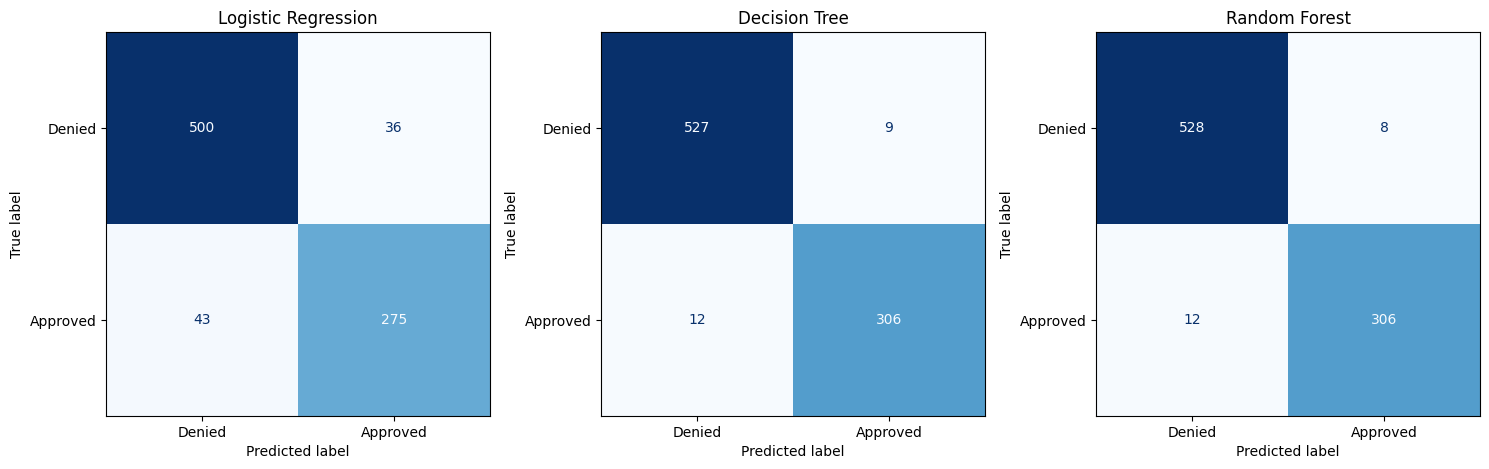

In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Logistic Regression
cm1 = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Denied', 'Approved'])
disp1.plot(cmap='Blues', ax=axes[0], colorbar=False)
axes[0].set_title("Logistic Regression")

# Decision Tree
cm2 = confusion_matrix(y_test, DT_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Denied', 'Approved'])
disp2.plot(cmap='Blues', ax=axes[1], colorbar=False)
axes[1].set_title("Decision Tree")

# Random Forest
cm3 = confusion_matrix(y_test, RF_pred)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['Denied', 'Approved'])
disp3.plot(cmap='Blues', ax=axes[2], colorbar=False)
axes[2].set_title("Random Forest")

plt.tight_layout()
plt.show()
